# Linear Regression


# Dataset - 3

In [276]:
import numpy as np
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import DatetimeTickFormatter
from bokeh.layouts import row, column

In [277]:
df = pd.read_excel('/content/3-hour-load-weather-data.xlsx')
df

,DATE,max-temp,min-temp,RH-0830,RH-1730,MW
0,2017-01-01 00:00:00,20.3,9.2,100,80,1815.571045
1,2017-01-01 01:00:00,20.3,9.2,100,80,1576.699585
2,2017-01-01 02:00:00,20.3,9.2,100,80,1428.967896
3,2017-01-01 03:00:00,20.3,9.2,100,80,1356.272705
4,2017-01-01 04:00:00,20.3,9.2,100,80,1354.029175
...,...,...,...,...,...,...
26275,2019-12-31 19:00:00,9.4,4.8,91,69,4157.812988
26276,2019-12-31 20:00:00,9.4,4.8,91,69,4008.450439
26277,2019-12-31 21:00:00,9.4,4.8,91,69,3757.650391
26278,2019-12-31 22:00:00,9.4,4.8,91,69,3556.840576


## Finding the correlation between the features

In [278]:
df.corr(method='pearson')

,max-temp,min-temp,RH-0830,RH-1730,MW
max-temp,1.000000,0.882116,-0.628697,-0.371664,0.666025
min-temp,0.882116,1.000000,-0.464201,-0.127366,0.768115
RH-0830,-0.628697,-0.464201,1.000000,0.538387,-0.338540
RH-1730,-0.371664,-0.127366,0.538387,1.000000,-0.054682
MW,0.666025,0.768115,-0.338540,-0.054682,1.000000


In [279]:
# x = df[['max-temp',	'min-temp',	'RH-0830',	'RH-1730', 'day']]
# y = df['MW']

## Split Data into Training and Testing

In [280]:
# MANUAL SPLIT

train = df.loc[ df['DATE'].dt.year < 2019 ]
test = df.loc[ df['DATE'].dt.year >= 2019 ]

x_train = train[['max-temp',	'min-temp',	'RH-0830',	'RH-1730']]
y_train = train['MW']

x_test = test[['max-temp',	'min-temp',	'RH-0830',	'RH-1730']]
y_test = test['MW']

In [281]:
# train_test_split => GIVING BETTER RESULTS

# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)


## Creating the model using Linear Regression

In [282]:
#Importing Linear Regression from linear_model library
from sklearn.linear_model import LinearRegression 

In [283]:
#Initialize the model
model = LinearRegression()

In [284]:
#Fitting our train data on the model
model.fit(x_train, y_train)

LinearRegression()

In [285]:
r2_score = model.score(x_test,y_test)
print(r2_score*100,'%')

53.96519658407757 %


## Evaluating our Model

In [286]:
print(model.coef_)
print(model.intercept_)


[  9.88954305 107.95798256   2.09138172   1.7195642 ]
969.1459551572539


In [287]:
model.coef_

array([  9.88954305, 107.95798256,   2.09138172,   1.7195642 ])

In [288]:
# coefficient_df = pd.DataFrame(model.coef_,x.columns,columns=['Coefficient'])
# coefficient_df

## Now we move on the the Prediction Analysis!

In [289]:
predictions = model.predict(x_test)

In [290]:
predictions

array([1925.9595085, 1925.9595085, 1925.9595085, ..., 1889.2716426,
       1889.2716426, 1889.2716426])

(array([ 288.,  827., 1627., 1971., 1819., 1334.,  610.,  227.,   41.,
          16.]),
 array([-1780.86228675, -1276.61367155,  -772.36505635,  -268.11644116,
          236.13217404,   740.38078923,  1244.62940443,  1748.87801962,
         2253.12663482,  2757.37525001,  3261.62386521]),
 <a list of 10 Patch objects>)

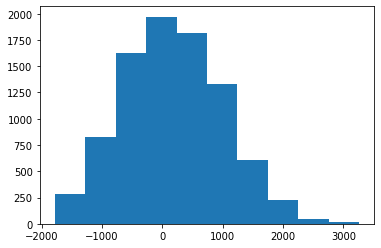

In [291]:
import matplotlib.pyplot as plt
plt.hist(y_test - predictions)

In [292]:
len(y_test)

8760

In [293]:
# pred and test

x = test['DATE']
y1 = y_test
y2 = predictions

p = figure(title="Date vs MW", 
           sizing_mode="stretch_width",
           x_axis_type='datetime',
           x_axis_label='Date',
           y_axis_label='MW')

p.line(x, y1, legend_label="Test", line_width=1)
p.line(x, y2, legend_label="Predicted", line_width=1, color='red')
p.xaxis[0].formatter = DatetimeTickFormatter(months="%b %Y")

output_notebook()
show(p)

## SCORE

In [294]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, predictions)

0.5597928054939407

In [295]:
from sklearn.metrics import r2_score 
r2_score(y_test, predictions)

0.5396519658407757

## Evaluating our Regression Model using Metrics

### 1. Mean Absolute Error

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$


### 2. Mean Squared Error

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$


### 3. Root Mean Squared Error

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$


## All these are basically "Loss Functions".
### A loss function is a measure of how good a prediction model does in terms of being able to predict the expected outcome. Basically, we want to reduce the value of Loss functions


In [296]:
from sklearn import metrics

In [297]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 676.0759102594719
MSE: 706374.5809104998
RMSE: 840.4609336016159


# Dataset - 4

In [298]:
import numpy as np
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import DatetimeTickFormatter
from bokeh.layouts import row, column

In [299]:
df = pd.read_excel('/content/4-day-load-weather-data.xlsx', parse_dates=True)
df

,date,max-temp,min-temp,RH-0830,RH-1730,MW
0,2017-01-01,20.3,9.2,100,80,3536.238770
1,2017-01-02,23.2,9.3,100,82,3639.738770
2,2017-01-03,24.3,9.5,100,77,3673.321289
3,2017-01-04,24.0,8.9,97,66,3898.860840
4,2017-01-05,25.2,10.4,97,71,3547.965820
...,...,...,...,...,...,...
1090,2019-12-27,13.4,4.2,86,76,4976.180664
1091,2019-12-28,14.4,2.4,100,83,4708.879395
1092,2019-12-29,13.3,3.1,94,79,4831.750488
1093,2019-12-30,15.8,2.6,100,97,5298.331055


## Finding the correlation between the features

In [300]:
df.corr(method='pearson')

,max-temp,min-temp,RH-0830,RH-1730,MW
max-temp,1.000000,0.882116,-0.628697,-0.371664,0.643710
min-temp,0.882116,1.000000,-0.464201,-0.127366,0.776070
RH-0830,-0.628697,-0.464201,1.000000,0.538387,-0.327478
RH-1730,-0.371664,-0.127366,0.538387,1.000000,-0.016560
MW,0.643710,0.776070,-0.327478,-0.016560,1.000000


In [301]:
# x = df['day']
# y = df['MW']

## Split Data into Training and Testing

In [302]:
# MANUAL SPLIT

train = df.loc[ df['date'].dt.year < 2019 ]
test = df.loc[ df['date'].dt.year >= 2019 ]

x_train = train[['max-temp',	'min-temp',	'RH-0830',	'RH-1730']]
y_train = train['MW']

x_test = test[['max-temp',	'min-temp',	'RH-0830',	'RH-1730']]
y_test = test['MW']

In [303]:
# train_test_split => GIVING BETTER RESULTS

# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)


## Creating the model using Linear Regression

In [304]:
#Importing Linear Regression from linear_model library
from sklearn.linear_model import LinearRegression 

In [305]:
#Initialize the model
model = LinearRegression()

In [306]:
#Fitting our train data on the model
model.fit(x_train, y_train)

LinearRegression()

In [307]:
r2_score = model.score(x_test,y_test)
print(r2_score*100,'%')

49.98659304400943 %


## Evaluating our Model

In [308]:
print(model.coef_)
print(model.intercept_)


[ -7.60471601 107.63976923   1.60569392   1.94811029]
2440.897293857974


In [309]:
model.coef_

array([ -7.60471601, 107.63976923,   1.60569392,   1.94811029])

In [310]:
# coefficient_df = pd.DataFrame(model.coef_,x.columns,columns=['Coefficient'])
# coefficient_df

## Now we move on the the Prediction Analysis!

In [311]:
predictions = model.predict(x_test)

In [312]:
predictions

array([2972.2952437 , 3244.00094377, 3271.32995403, 3355.92064108,
       3181.11049585, 3533.48620693, 3368.60921637, 3346.25044027,
       3418.07627799, 3211.27059995, 3091.3372089 , 3320.80293904,
       3471.28081125, 3365.7777811 , 3216.92720567, 3071.54612826,
       3022.09665517, 3079.8362723 , 3162.55426288, 3266.15624096,
       3788.37013918, 3954.32336625, 3486.4870548 , 3667.62041477,
       3646.92834635, 3222.74420096, 3145.70632802, 3155.82109933,
       3133.63523817, 3115.68501062, 3451.09331261, 3778.30038083,
       3482.49227872, 3623.0283435 , 3433.98193947, 3505.28628843,
       3854.97861912, 4202.33324852, 3320.7372813 , 3433.07150394,
       3213.21871024, 3293.69702167, 3682.4060533 , 3760.81587659,
       4048.84187987, 3865.3786167 , 3976.14078923, 3695.98286597,
       3755.19129937, 3826.20235554, 4131.19817597, 3979.34794324,
       4207.52237613, 3616.15657283, 3771.46379278, 3514.90777581,
       3658.39410034, 3572.62516042, 3277.80744982, 3257.43851

(array([ 1., 14., 42., 67., 65., 60., 72., 33.,  9.,  2.]),
 array([-1793.64999841, -1379.46612022,  -965.28224204,  -551.09836386,
         -136.91448567,   277.26939251,   691.4532707 ,  1105.63714888,
         1519.82102706,  1934.00490525,  2348.18878343]),
 <a list of 10 Patch objects>)

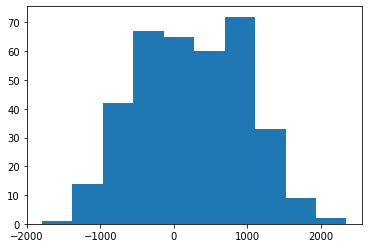

In [313]:
import matplotlib.pyplot as plt
plt.hist(y_test - predictions)

In [314]:
len(y_test)

365

In [315]:
# pred and test

x = test['date']
y1 = y_test
y2 = predictions

p = figure(title="Date vs MW", 
           sizing_mode="stretch_width",
           x_axis_type='datetime',
           x_axis_label='Date',
           y_axis_label='MW')

p.line(x, y1, legend_label="Test", line_width=1)
p.line(x, y2, legend_label="Predicted", line_width=1, color='red')
p.xaxis[0].formatter = DatetimeTickFormatter(months="%b %Y")

output_notebook()
show(p)

## SCORE

In [316]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, predictions)

0.5511703375899835

In [317]:
from sklearn.metrics import r2_score 
r2_score(y_test, predictions)

0.4998659304400943

## Evaluating our Regression Model using Metrics

### 1. Mean Absolute Error

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$


### 2. Mean Squared Error

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$


### 3. Root Mean Squared Error

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$


## All these are basically "Loss Functions".
### A loss function is a measure of how good a prediction model does in terms of being able to predict the expected outcome. Basically, we want to reduce the value of Loss functions


In [318]:
from sklearn import metrics

In [319]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 645.6003377323801
MSE: 595959.339639835
RMSE: 771.9840280989206


# Dataset - 5

In [320]:
import numpy as np
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import DatetimeTickFormatter
from bokeh.layouts import row, column

In [321]:
df = pd.read_excel('/content/5-hour-load-holiday-data.xlsx', parse_dates=True)
df

,DATE,day,MW
0,2017-01-01 00:00:00,2,1815.571045
1,2017-01-01 01:00:00,2,1576.699585
2,2017-01-01 02:00:00,2,1428.967896
3,2017-01-01 03:00:00,2,1356.272705
4,2017-01-01 04:00:00,2,1354.029175
...,...,...,...
26275,2019-12-31 19:00:00,0,4157.812988
26276,2019-12-31 20:00:00,0,4008.450439
26277,2019-12-31 21:00:00,0,3757.650391
26278,2019-12-31 22:00:00,0,3556.840576


## Finding the correlation between the features

In [322]:
df.corr(method='pearson')

,day,MW
day,1.000000,-0.127804
MW,-0.127804,1.000000


In [323]:
# x = df[['day']]
# y = df['MW']

## Split Data into Training and Testing

In [324]:
# MANUAL SPLIT

train = df.loc[ df['DATE'].dt.year < 2019 ]
test = df.loc[ df['DATE'].dt.year >= 2019 ]

x_train = train[['day']]
y_train = train['MW']

x_test = test[['day']]
y_test = test['MW']

In [325]:
# train_test_split => GIVING BETTER RESULTS

# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)


## Creating the model using Linear Regression

In [326]:
#Importing Linear Regression from linear_model library
from sklearn.linear_model import LinearRegression 

In [327]:
#Initialize the model
model = LinearRegression()

In [328]:
#Fitting our train data on the model
model.fit(x_train, y_train)

LinearRegression()

In [329]:
r2_score = model.score(x_test,y_test)
print(r2_score*100,'%')

-0.11218256686336137 %


## Evaluating our Model

In [330]:
print(model.coef_)
print(model.intercept_)


[-222.35609816]
3743.6200358418782


In [331]:
model.coef_

array([-222.35609816])

In [332]:
# coefficient_df = pd.DataFrame(model.coef_,x.columns,columns=['Coefficient'])
# coefficient_df

## Now we move on the the Prediction Analysis!

In [333]:
predictions = model.predict(x_test)

In [334]:
predictions

array([3298.90783952, 3298.90783952, 3298.90783952, ..., 3743.62003584,
       3743.62003584, 3743.62003584])

(array([ 660.,  612., 1219., 1715., 1388., 1271.,  979.,  611.,  265.,
          40.]),
 array([-2.39086125e+03, -1.79398261e+03, -1.19710396e+03, -6.00225322e+02,
        -3.34668075e+00,  5.93531961e+02,  1.19041060e+03,  1.78728924e+03,
         2.38416789e+03,  2.98104653e+03,  3.57792517e+03]),
 <a list of 10 Patch objects>)

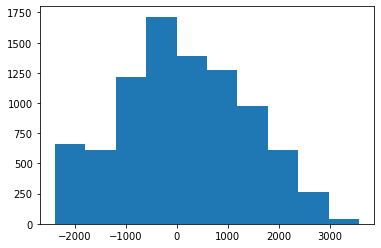

In [335]:
import matplotlib.pyplot as plt
plt.hist(y_test - predictions)

In [336]:
len(y_test)

8760

In [337]:
# pred and test

x = test['DATE']
y1 = y_test
y2 = predictions

p = figure(title="Date vs MW", 
           sizing_mode="stretch_width",
           x_axis_type='datetime',
           x_axis_label='Date',
           y_axis_label='MW')

p.line(x, y1, legend_label="Test", line_width=1)
p.line(x, y2, legend_label="Predicted", line_width=1, color='red')
p.xaxis[0].formatter = DatetimeTickFormatter(months="%b %Y")

output_notebook()
show(p)

## SCORE

In [338]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, predictions)

0.011431163811945866

In [339]:
from sklearn.metrics import r2_score 
r2_score(y_test, predictions)

-0.0011218256686336137

## Evaluating our Regression Model using Metrics

### 1. Mean Absolute Error

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$


### 2. Mean Squared Error

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$


### 3. Root Mean Squared Error

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$


## All these are basically "Loss Functions".
### A loss function is a measure of how good a prediction model does in terms of being able to predict the expected outcome. Basically, we want to reduce the value of Loss functions


In [340]:
from sklearn import metrics

In [341]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1014.7932584647659
MSE: 1536157.336565147
RMSE: 1239.4181443585321


# Dataset - 6

In [342]:
import numpy as np
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import DatetimeTickFormatter
from bokeh.layouts import row, column

In [343]:
df = pd.read_excel('/content/6-day-load-holiday-data.xlsx', parse_dates=True)
df

,date,day,MW
0,2017-01-01,2,3536.238770
1,2017-01-02,0,3639.738770
2,2017-01-03,0,3673.321289
3,2017-01-04,0,3898.860840
4,2017-01-05,2,3547.965820
...,...,...,...
1090,2019-12-27,0,4976.180664
1091,2019-12-28,1,4708.879395
1092,2019-12-29,1,4831.750488
1093,2019-12-30,0,5298.331055


## Finding the correlation between the features

In [344]:
df.corr(method='pearson')

,day,MW
day,1.000000,-0.150346
MW,-0.150346,1.000000


In [345]:
# x = df['day']
# y = df['MW']

## Split Data into Training and Testing

In [346]:
# MANUAL SPLIT

train = df.loc[ df['date'].dt.year < 2019 ]
test = df.loc[ df['date'].dt.year >= 2019 ]

x_train = train[['day']]
y_train = train['MW']

x_test = test[['day']]
y_test = test['MW']

In [347]:
# train_test_split => GIVING BETTER RESULTS

# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)


## Creating the model using Linear Regression

In [348]:
#Importing Linear Regression from linear_model library
from sklearn.linear_model import LinearRegression 

In [349]:
#Initialize the model
model = LinearRegression()

In [350]:
#Fitting our train data on the model
model.fit(x_train, y_train)

LinearRegression()

In [351]:
r2_score = model.score(x_test,y_test)
print(r2_score*100,'%')

-2.6964393800715802 %


## Evaluating our Model

In [352]:
print(model.coef_)
print(model.intercept_)


[-227.85178461]
4624.310668447066


In [353]:
model.coef_

array([-227.85178461])

In [354]:
# coefficient_df = pd.DataFrame(model.coef_,x.columns,columns=['Coefficient'])
# coefficient_df

## Now we move on the the Prediction Analysis!

In [355]:
predictions = model.predict(x_test)

In [356]:
predictions

array([4168.60709923, 4624.31066845, 4624.31066845, 4624.31066845,
       4396.45888384, 4396.45888384, 4624.31066845, 4624.31066845,
       4624.31066845, 4624.31066845, 4624.31066845, 4396.45888384,
       4168.60709923, 4168.60709923, 4168.60709923, 4624.31066845,
       4624.31066845, 4624.31066845, 4396.45888384, 4396.45888384,
       4624.31066845, 4624.31066845, 4624.31066845, 4624.31066845,
       4624.31066845, 4168.60709923, 4396.45888384, 4624.31066845,
       4624.31066845, 4624.31066845, 4624.31066845, 4624.31066845,
       4396.45888384, 4396.45888384, 4624.31066845, 4624.31066845,
       4624.31066845, 4624.31066845, 4624.31066845, 4396.45888384,
       4168.60709923, 4624.31066845, 4624.31066845, 4624.31066845,
       4624.31066845, 4624.31066845, 4396.45888384, 4396.45888384,
       4624.31066845, 4168.60709923, 4624.31066845, 4624.31066845,
       4624.31066845, 4396.45888384, 4396.45888384, 4624.31066845,
       4624.31066845, 4624.31066845, 4624.31066845, 4168.60709

(array([ 2., 59., 64., 69., 29., 34., 39., 32., 30.,  7.]),
 array([-1812.59318322, -1352.90204112,  -893.21089901,  -433.51975691,
           26.17138519,   485.86252729,   945.55366939,  1405.2448115 ,
         1864.9359536 ,  2324.6270957 ,  2784.3182378 ]),
 <a list of 10 Patch objects>)

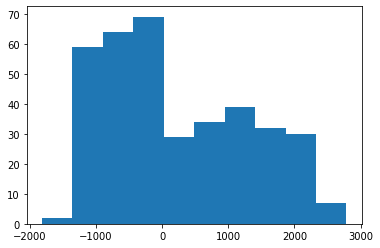

In [357]:
import matplotlib.pyplot as plt
plt.hist(y_test - predictions)

In [358]:
len(y_test)

365

In [359]:
# pred and test

x = test['date']
y1 = y_test
y2 = predictions

p = figure(title="Date vs MW", 
           sizing_mode="stretch_width",
           x_axis_type='datetime',
           x_axis_label='Date',
           y_axis_label='MW')

p.line(x, y1, legend_label="Test", line_width=1)
p.line(x, y2, legend_label="Predicted", line_width=1, color='red')
p.xaxis[0].formatter = DatetimeTickFormatter(months="%b %Y")

output_notebook()
show(p)

## SCORE

In [360]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, predictions)

0.015579582698509897

In [361]:
from sklearn.metrics import r2_score 
r2_score(y_test, predictions)

-0.026964393800715802

## Evaluating our Regression Model using Metrics

### 1. Mean Absolute Error

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$


### 2. Mean Squared Error

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$


### 3. Root Mean Squared Error

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$


## All these are basically "Loss Functions".
### A loss function is a measure of how good a prediction model does in terms of being able to predict the expected outcome. Basically, we want to reduce the value of Loss functions


In [362]:
from sklearn import metrics

In [363]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 924.5255653906474
MSE: 1223729.9140641536
RMSE: 1106.223265920652


# Dataset - 7

In [364]:
import numpy as np
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import DatetimeTickFormatter
from bokeh.layouts import row, column

In [365]:
df = pd.read_excel('/content/7-hour-load-weather-holiday-data.xlsx', parse_dates=True)
df

,DATE,max-temp,min-temp,RH-0830,RH-1730,day,MW
0,2017-01-01 00:00:00,20.3,9.2,100,80,2,1815.571045
1,2017-01-01 01:00:00,20.3,9.2,100,80,2,1576.699585
2,2017-01-01 02:00:00,20.3,9.2,100,80,2,1428.967896
3,2017-01-01 03:00:00,20.3,9.2,100,80,2,1356.272705
4,2017-01-01 04:00:00,20.3,9.2,100,80,2,1354.029175
...,...,...,...,...,...,...,...
26275,2019-12-31 19:00:00,9.4,4.8,91,69,0,4157.812988
26276,2019-12-31 20:00:00,9.4,4.8,91,69,0,4008.450439
26277,2019-12-31 21:00:00,9.4,4.8,91,69,0,3757.650391
26278,2019-12-31 22:00:00,9.4,4.8,91,69,0,3556.840576


## Finding the correlation between the features

In [366]:
df.corr(method='pearson')

,max-temp,min-temp,RH-0830,RH-1730,day,MW
max-temp,1.000000,0.882116,-0.628697,-0.371664,-0.034996,0.666025
min-temp,0.882116,1.000000,-0.464201,-0.127366,-0.050936,0.768115
RH-0830,-0.628697,-0.464201,1.000000,0.538387,-0.005248,-0.338540
RH-1730,-0.371664,-0.127366,0.538387,1.000000,-0.029325,-0.054682
day,-0.034996,-0.050936,-0.005248,-0.029325,1.000000,-0.127804
MW,0.666025,0.768115,-0.338540,-0.054682,-0.127804,1.000000


In [367]:
x = df[['max-temp',	'min-temp',	'RH-0830',	'RH-1730', 'day']]
y = df['MW']

## Split Data into Training and Testing

In [368]:
# MANUAL SPLIT

train = df.loc[ df['DATE'].dt.year < 2019 ]
test = df.loc[ df['DATE'].dt.year >= 2019 ]

x_train = train[['max-temp',	'min-temp',	'RH-0830',	'RH-1730', 'day']]
y_train = train['MW']

x_test = test[['max-temp',	'min-temp',	'RH-0830',	'RH-1730', 'day']]
y_test = test['MW']

In [369]:
# train_test_split => GIVING BETTER RESULTS

# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)


## Creating the model using Linear Regression

In [370]:
#Importing Linear Regression from linear_model library
from sklearn.linear_model import LinearRegression 

In [371]:
#Initialize the model
model = LinearRegression()

In [372]:
#Fitting our train data on the model
model.fit(x_train, y_train)

LinearRegression()

In [373]:
r2_score = model.score(x_test,y_test)
print(r2_score*100,'%')

54.761744885864935 %


## Evaluating our Model

In [374]:
print(model.coef_)
print(model.intercept_)


[   9.66460443  107.02633838    1.82525809    1.67253065 -141.44344961]
1086.9443281308281


In [375]:
model.coef_

array([   9.66460443,  107.02633838,    1.82525809,    1.67253065,
       -141.44344961])

In [376]:
coefficient_df = pd.DataFrame(model.coef_,x.columns,columns=['Coefficient'])
coefficient_df

,Coefficient
max-temp,9.664604
min-temp,107.026338
RH-0830,1.825258
RH-1730,1.672531
day,-141.443450


## Now we move on the the Prediction Analysis!

In [377]:
predictions = model.predict(x_test)

In [378]:
predictions

array([1722.90452607, 1722.90452607, 1722.90452607, ..., 1973.02113492,
       1973.02113492, 1973.02113492])

(array([ 215.,  714., 1511., 2001., 1894., 1397.,  679.,  281.,   49.,
          19.]),
 array([-1849.8311109 , -1347.06056252,  -844.29001414,  -341.51946576,
          161.25108262,   664.021631  ,  1166.79217938,  1669.56272776,
         2172.33327614,  2675.10382452,  3177.87437289]),
 <a list of 10 Patch objects>)

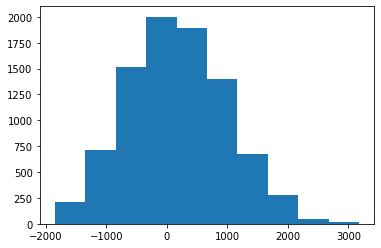

In [379]:
import matplotlib.pyplot as plt
plt.hist(y_test - predictions)

In [380]:
len(y_test)

8760

In [381]:
# pred and test

x = test['DATE']
y1 = y_test
y2 = predictions

p = figure(title="Date vs MW", 
           sizing_mode="stretch_width",
           x_axis_type='datetime',
           x_axis_label='Date',
           y_axis_label='MW')

p.line(x, y1, legend_label="Test", line_width=1)
p.line(x, y2, legend_label="Predicted", line_width=1, color='red')
p.xaxis[0].formatter = DatetimeTickFormatter(months="%b %Y")

output_notebook()
show(p)

## SCORE

In [382]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, predictions)

0.5673748401490348

In [383]:
from sklearn.metrics import r2_score 
r2_score(y_test, predictions)

0.5476174488586494

## Evaluating our Regression Model using Metrics

### 1. Mean Absolute Error

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$


### 2. Mean Squared Error

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$


### 3. Root Mean Squared Error

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$


## All these are basically "Loss Functions".
### A loss function is a measure of how good a prediction model does in terms of being able to predict the expected outcome. Basically, we want to reduce the value of Loss functions


In [384]:
from sklearn import metrics

In [385]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 665.8331922146739
MSE: 694152.0572740587
RMSE: 833.1578825613178


# Dataset - 8

In [386]:
import numpy as np
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import DatetimeTickFormatter
from bokeh.layouts import row, column

In [387]:
df = pd.read_excel('/content/8-day-load-weather-holiday-data.xlsx', parse_dates=True)
df

,date,max-temp,min-temp,RH-0830,RH-1730,MW,day
0,2017-01-01,20.3,9.2,100,80,3536.238770,2
1,2017-01-02,23.2,9.3,100,82,3639.738770,0
2,2017-01-03,24.3,9.5,100,77,3673.321289,0
3,2017-01-04,24.0,8.9,97,66,3898.860840,0
4,2017-01-05,25.2,10.4,97,71,3547.965820,2
...,...,...,...,...,...,...,...
1090,2019-12-27,13.4,4.2,86,76,4976.180664,0
1091,2019-12-28,14.4,2.4,100,83,4708.879395,1
1092,2019-12-29,13.3,3.1,94,79,4831.750488,1
1093,2019-12-30,15.8,2.6,100,97,5298.331055,0


## Finding the correlation between the features

In [388]:
df.corr(method='pearson')

,max-temp,min-temp,RH-0830,RH-1730,MW,day
max-temp,1.000000,0.882116,-0.628697,-0.371664,0.643710,-0.034996
min-temp,0.882116,1.000000,-0.464201,-0.127366,0.776070,-0.050936
RH-0830,-0.628697,-0.464201,1.000000,0.538387,-0.327478,-0.005248
RH-1730,-0.371664,-0.127366,0.538387,1.000000,-0.016560,-0.029325
MW,0.643710,0.776070,-0.327478,-0.016560,1.000000,-0.150346
day,-0.034996,-0.050936,-0.005248,-0.029325,-0.150346,1.000000


In [389]:
x = df[['max-temp',	'min-temp',	'RH-0830',	'RH-1730', 'day']]
y = df['MW']

## Split Data into Training and Testing

In [390]:
# MANUAL SPLIT

train = df.loc[ df['date'].dt.year < 2019 ]
test = df.loc[ df['date'].dt.year >= 2019 ]

x_train = train[['max-temp',	'min-temp',	'RH-0830',	'RH-1730', 'day']]
y_train = train['MW']

x_test = test[['max-temp',	'min-temp',	'RH-0830',	'RH-1730', 'day']]
y_test = test['MW']

In [391]:
# train_test_split => GIVING BETTER RESULTS

# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)


## Creating the model using Linear Regression

In [392]:
#Importing Linear Regression from linear_model library
from sklearn.linear_model import LinearRegression 

In [393]:
#Initialize the model
model = LinearRegression()

In [394]:
#Fitting our train data on the model
model.fit(x_train, y_train)

LinearRegression()

In [395]:
r2_score = model.score(x_test,y_test)
print(r2_score*100,'%')

51.19829940145966 %


## Evaluating our Model

In [396]:
print(model.coef_)
print(model.intercept_)


[  -7.84973723  106.62494749    1.31581066    1.89687757 -154.0715758 ]
2569.2127513814953


In [397]:
model.coef_

array([  -7.84973723,  106.62494749,    1.31581066,    1.89687757,
       -154.0715758 ])

In [398]:
coefficient_df = pd.DataFrame(model.coef_,x.columns,columns=['Coefficient'])
coefficient_df

,Coefficient
max-temp,-7.849737
min-temp,106.624947
RH-0830,1.315811
RH-1730,1.896878
day,-154.071576


## Now we move on the the Prediction Analysis!

In [400]:
predictions = model.predict(x_test)

In [401]:
predictions

array([2751.11143347, 3331.46585586, 3354.79415675, 3439.17714943,
       3112.74010081, 3460.41383209, 3451.93254566, 3429.75767201,
       3503.17448685, 3297.07662192, 3177.06368872, 3250.11039333,
       3246.56824761, 3146.62730763, 2994.88632999, 3158.09382764,
       3108.50999136, 3165.42019634, 3093.83711364, 3195.86014713,
       3865.83318333, 4030.7143364 , 3568.43372155, 3747.66814124,
       3727.13050345, 3000.20789277, 3077.54781124, 3243.67688163,
       3222.59134846, 3203.25050308, 3537.38129197, 3858.81968605,
       3409.45607226, 3551.76072664, 3517.08691366, 3588.59705364,
       3932.0062073 , 4278.35346531, 3405.36049053, 3367.001521  ,
       2990.83034789, 3379.15709413, 3764.36485556, 3840.34857576,
       4125.07856614, 3944.88843744, 3900.79499362, 3623.27535343,
       3836.00821785, 3595.98286888, 4206.71458984, 4057.96561713,
       4282.64876373, 3549.07745017, 3701.28346876, 3599.7952813 ,
       3739.55536085, 3656.54732797, 3363.53891768, 3035.16779

(array([ 3., 25., 47., 62., 64., 61., 64., 27.,  9.,  3.]),
 array([-1567.01336768, -1184.27792118,  -801.54247467,  -418.80702816,
          -36.07158165,   346.66386486,   729.39931137,  1112.13475788,
         1494.87020438,  1877.60565089,  2260.3410974 ]),
 <a list of 10 Patch objects>)

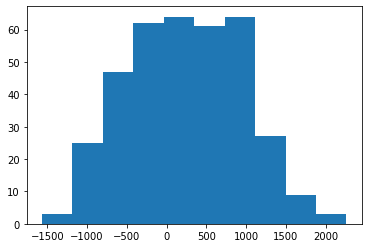

In [402]:
import matplotlib.pyplot as plt
plt.hist(y_test - predictions)

In [403]:
len(y_test)

365

In [404]:
# pred and test

x = test['date']
y1 = y_test
y2 = predictions

p = figure(title="Date vs MW", 
           sizing_mode="stretch_width",
           x_axis_type='datetime',
           x_axis_label='Date',
           y_axis_label='MW')

p.line(x, y1, legend_label="Test", line_width=1)
p.line(x, y2, legend_label="Predicted", line_width=1, color='red')
p.xaxis[0].formatter = DatetimeTickFormatter(months="%b %Y")

output_notebook()
show(p)

## SCORE

In [405]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, predictions)

0.5625301066474855

In [406]:
from sklearn.metrics import r2_score 
r2_score(y_test, predictions)

0.5119829940145966

## Evaluating our Regression Model using Metrics

### 1. Mean Absolute Error

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$


### 2. Mean Squared Error

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$


### 3. Root Mean Squared Error

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$


## All these are basically "Loss Functions".
### A loss function is a measure of how good a prediction model does in terms of being able to predict the expected outcome. Basically, we want to reduce the value of Loss functions


In [407]:
from sklearn import metrics

In [408]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 635.5698869310831
MSE: 581520.6568030741
RMSE: 762.5750171642617
